In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [4]:
raw_data = pd.read_csv('Data_Africa.csv')

In [5]:
raw_data.head()

,ID,Year,Country,Continent,Population,GDP (USD)
0,1,2000,Uganda,East Africa,23303189,6.193247e+09
1,2,2001,Uganda,East Africa,24022603,5.840504e+09
2,3,2002,Uganda,East Africa,24781316,5.840504e+09
3,4,2003,Uganda,East Africa,25577246,6.606884e+09
4,5,2004,Uganda,East Africa,26403221,7.939488e+09


In [6]:
data = raw_data.copy()

In [7]:
data['Country'].unique()

array(['Uganda', 'Burundi', 'Djibouti', 'Zambia', 'Zimbabwe', 'Kenya',
       'Union of the Comors', 'Mauritius', 'Madagascar', 'Mayotte',
       'Malawi', 'Mozambique', 'Reunion', 'Rwanda', 'Seyshelles',
       'Somalia', 'Tanzania', 'Eritrea', 'Ethiopia', 'South Sudan',
       'Sudan', 'Algeria', 'Egypt', 'SADR', 'Libya', 'Morocco', 'Tunisia',
       'Botswana', 'Lesotho', 'Namibia', 'Eswatini', 'South Africa',
       'Angola', 'Gabon', 'Cameroon', 'Democratic Republic of the Congo',
       'Republic of the Congo', 'Sao Tome and Principe',
       'Central African Republic', 'Chad', 'Equatorial Guinea', 'Benin',
       'Burkina Faso', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Cape Verde', 'Ivory Coast', 'Liberia', 'Mauritania', 'Mali',
       'Niger', 'Nigeria', 'Saint Helena, Ascension and Tristan da Cunha',
       'Senegal', 'Sierra Leone', 'Togo'], dtype=object)

In [8]:
data['Continent'].unique()

array(['East Africa', 'North Africa', 'South Africa', 'Central Africa',
       'West Africa'], dtype=object)

In [9]:
data['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022], dtype=int64)

In [10]:
data.isnull().sum()

ID               0
Year             0
Country          0
Continent        0
Population       0
GDP (USD)      155
dtype: int64

In [11]:
data['GDP (USD)'] = data['GDP (USD)'].fillna(data.groupby('Continent')['GDP (USD)'].transform('mean'))

In [12]:
data.isnull().sum()

ID             0
Year           0
Country        0
Continent      0
Population     0
GDP (USD)      0
dtype: int64

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Axes: xlabel='Year', ylabel='GDP (USD)'>

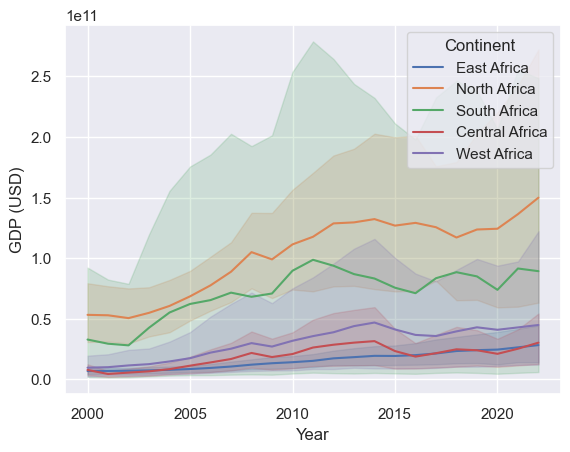

In [13]:
sns.lineplot(data = data, x = 'Year', y = 'GDP (USD)', hue = 'Continent')

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecat

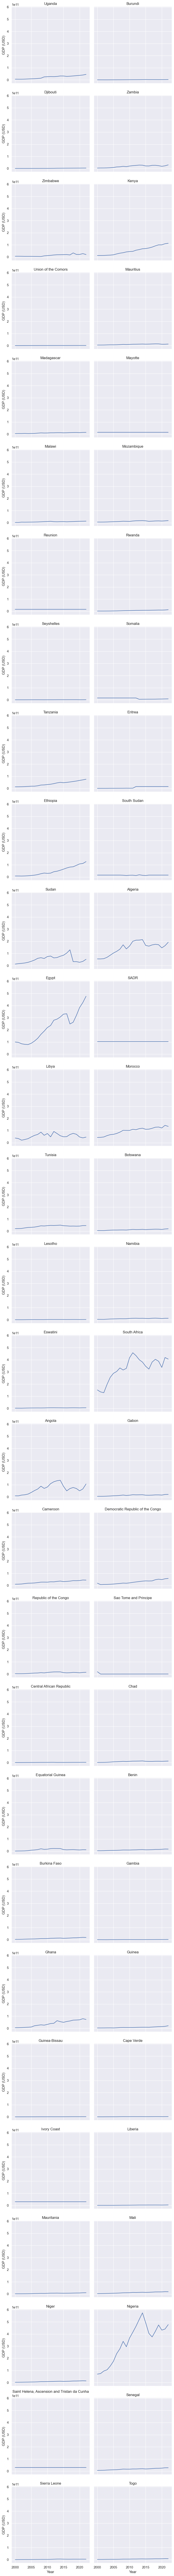

In [14]:
g = sns.FacetGrid(data, col="Country", col_wrap=2, height=4)
g.map_dataframe(sns.lineplot, x="Year", y="GDP (USD)")
g.set_axis_labels("Year", "GDP (USD)")
g.set_titles(col_template="{col_name}")
plt.tight_layout()
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

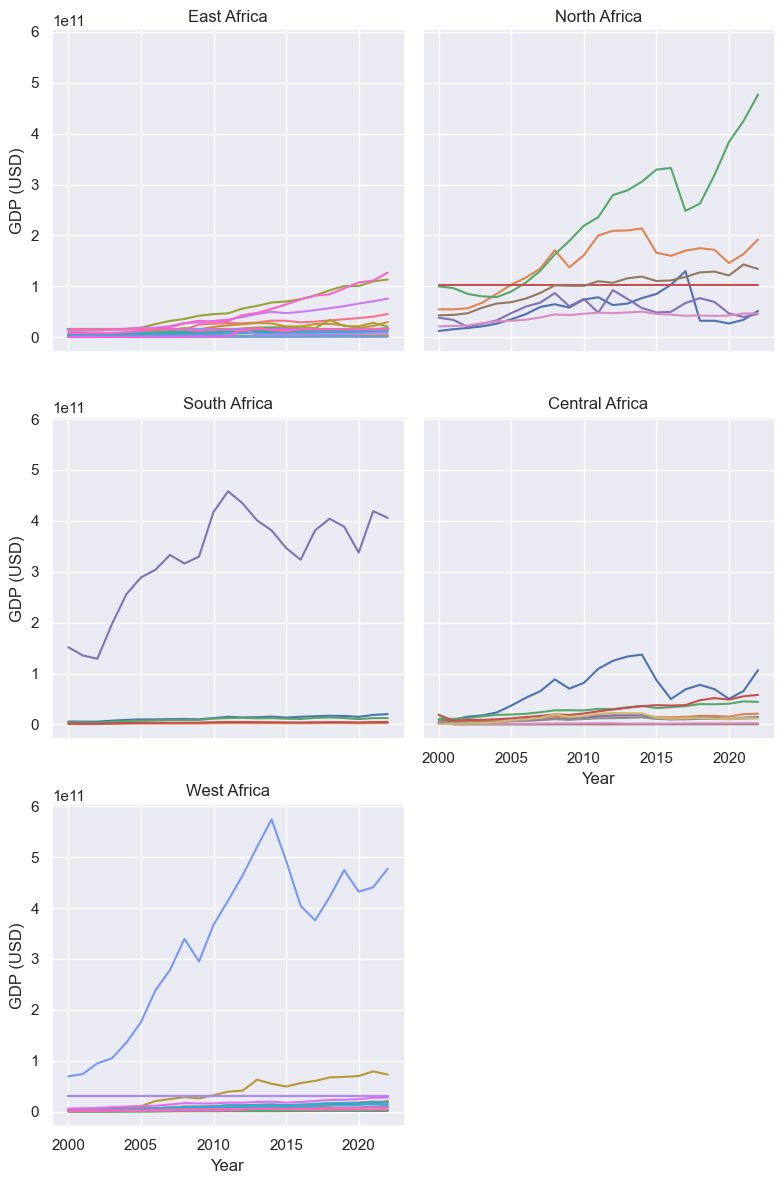

In [15]:
g = sns.FacetGrid(data, col="Continent", col_wrap=2, height=4)
g.map_dataframe(sns.lineplot, x="Year", y="GDP (USD)", hue="Country")
g.set_axis_labels("Year", "GDP (USD)")
g.set_titles(col_template="{col_name}")
plt.tight_layout()
plt.show()

In [16]:
data.columns.values

array(['ID', 'Year', 'Country', 'Continent', 'Population ', 'GDP (USD)'],
      dtype=object)